AUTHOR:         
marwa Osman: marwaosman9975@gmail.com    

👉 [LinkedIn](https://www.linkedin.com/in/marwa-osman-00190b222/)

👉 [GitHub](https://github.com/marwa9975)

# Customer Churn Analysis for Telecommunications Company

![image](image.png)

## BUSINESS UNDERSTANDING 

The objective of this project is to analyze customer churn for a telecommunications company. Customer churn, or attrition, is a critical concern for most telecom companies, as retaining existing customers is often more cost-effective than acquiring new ones. The goal is to perform a comprehensive analysis to understand the factors contributing to customer churn and develop strategies to reduce it.

Key Objectives:
The primary objectives of this project are as follows:

* Predict Churn: Develop a machine learning model that accurately predicts customer churn based on historical data.
* Identify Factors: Identify the key factors or features that influence customer churn. This will provide insights into what aspects of telecommunications company's services or customer experiences need improvement.
* Take Preventive Actions: Use the model's predictions to take preventive actions, such as targeted marketing campaigns, personalized offers, or customer support interventions, to reduce churn.

## DATA UNDERSTANDING  

The data is obtained from kaggle:[Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

The columns include:      
``customerID``: A unique identifier for each customer.    
``gender``: The gender of the customer (categorical: 'Male' or 'Female').   
``SeniorCitizen``: Indicates whether the customer is a senior citizen (binary: 0 for 'No,' 1 for 'Yes').    
``Partner``: Indicates whether the customer has a partner (binary: 'Yes' or 'No').  
``Dependents``: Indicates whether the customer has dependents (binary: 'Yes' or 'No').  
``tenure``: The number of months the customer has stayed with the company(numeric).  
``PhoneService``: Indicates whether the customer has phone service (binary: 'Yes' or 'No').   
``MultipleLines``: Indicates whether the customer has multiple phone lines (categorical: 'No phone service,' 'No,' or 'Yes').    
``InternetService``: The type of internet service subscribed by the customer (categorical: 'DSL,' 'Fiber optic,' or 'No').   
``OnlineSecurity``: Indicates whether the customer has online security (categorical: 'No,' 'Yes,' or 'No internet service').    
``OnlineBackup``: Indicates whether the customer has online backup (categorical: 'No,' 'Yes,' or 'No internet service').  
``DeviceProtection``: Indicates whether the customer has device protection (categorical: 'No,' 'Yes,' or 'No internet service').   
``TechSupport``: Indicates whether the customer has tech support (categorical: 'No,' 'Yes,' or 'No internet service').     
``StreamingTV``: Indicates whether the customer has streaming TV (categorical: 'No,' 'Yes,' or 'No internet service').    
``StreamingMovies``: Indicates whether the customer has streaming movies (categorical: 'No,' 'Yes,' or 'No internet service').   
``Contract``: The type of contract the customer has (categorical: 'Month-to-month,' 'One year,' or 'Two year').   
``PaperlessBilling``: Indicates whether the customer prefers paperless billing (binary: 'Yes' or 'No').   
``PaymentMethod``: The payment method used by the customer (categorical: 'Electronic check,' 'Mailed check,' 'Bank transfer (automatic),' or 'Credit card (automatic)').   
``MonthlyCharges``: The amount of the customer's monthly charges (numeric).   
``TotalCharges``: The total amount the customer has been charged (numeric).    
``Churn``: The target variable indicating whether the customer has churned (binary: 'Yes' or 'No')    

In [79]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
#Initialize the DataUnderstanding class
class DataUnderstanding:
    def __init__(self, df):
        self.df = df
# Get the summary statistics
    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
# Get the count of missing values
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
# Get the summary of the DataFrame   
    def get_info(self):
        info = self.df.info()
        return info
# Get the data types
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes  
 # GeT Value counts   
    def get_value_counts(self):
        value_counts = {}
        for column in self.df.columns:
            value_counts[column] = self.df[column].value_counts()
        return value_counts
    

In [81]:
# load the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
# Initialize the DataUnderstanding class
du = DataUnderstanding(df)

In [83]:
du.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The data has 7043 entries and 21 columns

In [84]:
# Get the summary statistics
du.get_summary_statistics()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [85]:
# Get data types
du.get_dtypes()

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## DATA PREPARATION

#### Check for missing values

In [86]:
du.get_missing_values()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data has no missing values

#### Convert 'TotalCharges' to Numeric 
TotalCharges' column should be numeric, but it's currently stored as an object

In [87]:
# Convert totalcharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [88]:
# confirm the data type after changing
df['TotalCharges'].dtype

dtype('float64')

#### Get value counts

In [89]:
# get value counts
du.get_value_counts()

{'customerID': 7590-VHVEG    1
 3791-LGQCY    1
 6008-NAIXK    1
 5956-YHHRX    1
 5365-LLFYV    1
              ..
 9796-MVYXX    1
 2637-FKFSY    1
 1552-AAGRX    1
 4304-TSPVK    1
 3186-AJIEK    1
 Name: customerID, Length: 7043, dtype: int64,
 'gender': Male      3555
 Female    3488
 Name: gender, dtype: int64,
 'SeniorCitizen': 0    5901
 1    1142
 Name: SeniorCitizen, dtype: int64,
 'Partner': No     3641
 Yes    3402
 Name: Partner, dtype: int64,
 'Dependents': No     4933
 Yes    2110
 Name: Dependents, dtype: int64,
 'tenure': 1     613
 72    362
 2     238
 3     200
 4     176
      ... 
 28     57
 39     56
 44     51
 36     50
 0      11
 Name: tenure, Length: 73, dtype: int64,
 'PhoneService': Yes    6361
 No      682
 Name: PhoneService, dtype: int64,
 'MultipleLines': No                  3390
 Yes                 2971
 No phone service     682
 Name: MultipleLines, dtype: int64,
 'InternetService': Fiber optic    3096
 DSL            2421
 No             1526
 Nam

#### Check for duplicates  
CustomerID will be used here since it is a unique identifier

In [90]:
# check for duplicates 
df.duplicated(subset='customerID').sum()

0

There is no duplicates

#### Detecting outliers and removing outliers

In [91]:
# Set the plot style to a dark theme
plt.style.use('dark_background')

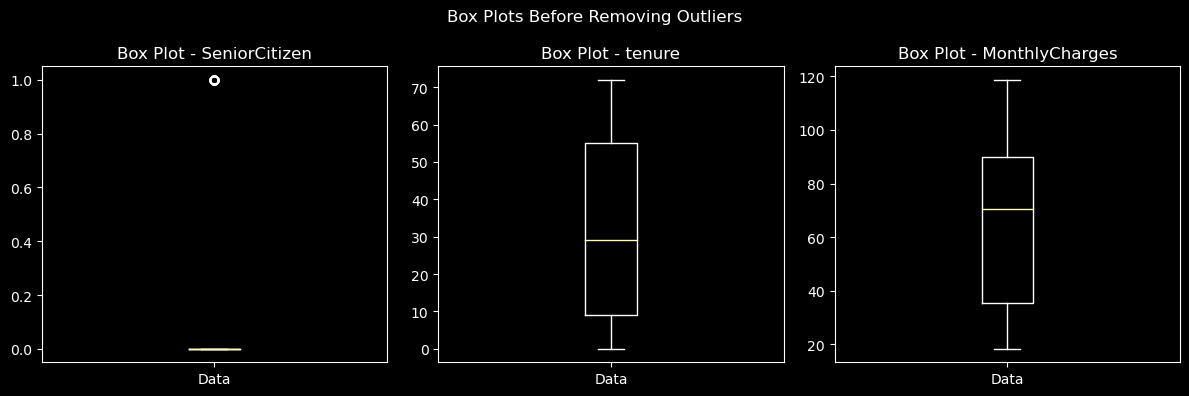

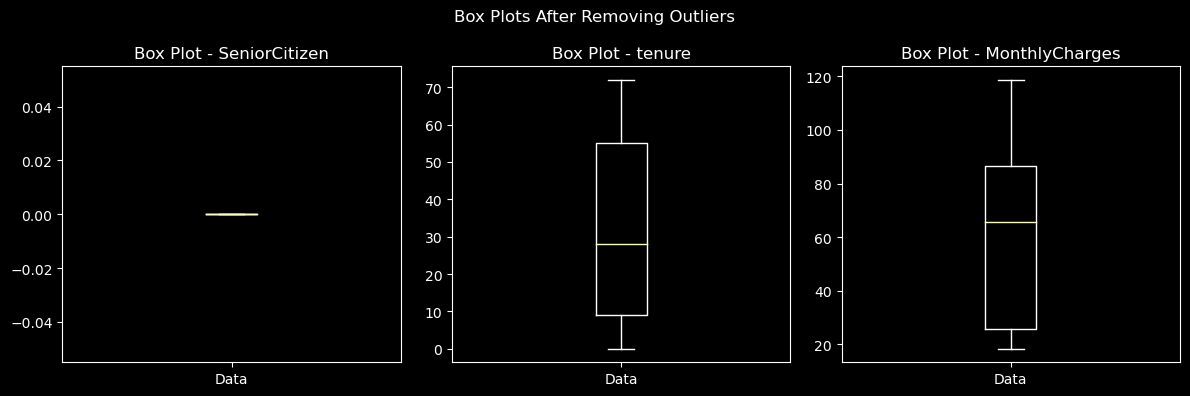

In [93]:
# plot
def plot_boxplots(data, column_names, title):
    plt.figure(figsize=(12, 4))
    for i, column in enumerate(column_names, 1):
        plt.subplot(1, len(column_names), i)
        plt.boxplot(data[column])
        plt.title(f'Box Plot - {column}')
        plt.xticks([1], ['Data'])

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']

# Plot box plots before removing outliers
plot_boxplots(df, numeric_columns, 'Box Plots Before Removing Outliers')

def remove_outliers_iqr(df, column_names):
    outliers_removed = df.copy()
    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect and remove outliers
        outliers_removed = outliers_removed[(outliers_removed[column] >= lower_bound) &
                                              (outliers_removed[column] <= upper_bound)]

    return outliers_removed

# Detect and remove outliers
df = remove_outliers_iqr(df, numeric_columns)

# Plot box plots after removing outliers
plot_boxplots(df, numeric_columns, 'Box Plots After Removing Outliers')


## EXPLORATORY DATA ANALYSIS